In [1]:
#使用最小二乘法（线性代数公式推导）求解线性回归，对比梯度下降法

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib as mpl
mpl.rcParams['font.sans-serif']=[u'simHei']

In [3]:
# 1. 加载数据
path = 'household_power_consumption_200.txt'
df = pd.read_csv(path,sep=';')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
Date                     200 non-null object
Time                     200 non-null object
Global_active_power      200 non-null float64
Global_reactive_power    200 non-null float64
Voltage                  200 non-null float64
Global_intensity         200 non-null float64
Sub_metering_1           200 non-null float64
Sub_metering_2           200 non-null float64
Sub_metering_3           200 non-null float64
dtypes: float64(7), object(2)
memory usage: 14.1+ KB
None


In [4]:
# 2.找出输入模型的特征属性和目标属性
X=df.iloc[:,2:4]
y=df.iloc[:,5]
print(X.head())
print(y[0:5])

   Global_active_power  Global_reactive_power
0                4.216                  0.418
1                5.360                  0.436
2                5.374                  0.498
3                5.388                  0.502
4                3.666                  0.528
0    18.4
1    23.0
2    23.0
3    23.0
4    15.8
Name: Global_intensity, dtype: float64


In [6]:
# 3.划分训练集和测试集
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=174)
# print('测试集的样本:{}'.format(X_train.shape))
# print('测试集的样本:{}'.format(X_test.shape))
# print(y.shape)

In [7]:
# 4.求解方程的解

X_train=np.mat(X_train)
y_train=np.mat(y_train).reshape(-1,1)
# print(X_train.shape)
# print(y_train.shape)
# 最小二乘公式theta
theta=(X_train.T*X_train).I*X_train.T*y_train
print(theta)

[[4.27850874]
 [0.10480247]]


In [8]:
# 5.使用模型求解出来的theta进行预测
predict_y = np.mat(X_test)*theta

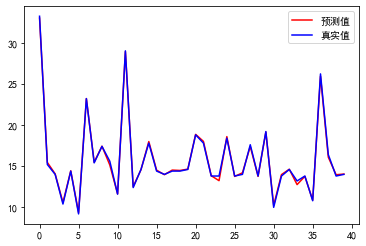

In [9]:
# 6.画图看效果
t = np.arange(len(X_test))
plt.figure(facecolor='w')
plt.plot(t,predict_y,'r-',label='预测值')
plt.plot(t,y_test,'b-',label='真实值')
plt.legend()
plt.show()